---

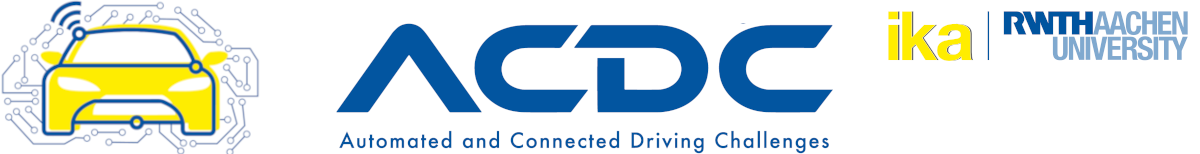

## *Visual Lane Following for Scaled Automated Vehicles*

**Automated and Connected Driving Challenges - Research Project - *05/2023***

**Research Topic *07: Visual Lane Following for Scaled Automated Vehicles***



| Author | Mail |
| --- | --- |
| *Akashdeep Roy* | *akashdeep.roy@rwth-aachen.de* |
| *Joy Sengupta* | *joy.sengupta@rwth-aachen.de* |
| *Paulo Belarmino* | *paulo.belarmino@rwth-aachen.de* |


## Abstract

*Autonomous Technology and Automated Vehicles are on road to be a vital part of modern mobility. More than half of newly manufactured vehicles are expected to have atleast L2 level Autonomy in the next few years. Our research project focuses on the autonomous technology enabling the vehicles. In this context, the aim of this paper has been to develop a methodology to visually detect, track, and follow driving lanes with a scaled automated and connected vehicle. The scope of this project is on the basis of Lane Keeping Assist feature, now mandatory in the EU for new cars from 2022 [[1]](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=pi_com%3AAres%282021%29302456). The research involves domains under Sensor Data Processing, Vehicle Guidance and Connected Vehicle. The work in this paper can be divided into 3 main parts. Perception under Sensor Data processing for sensing and tracking the driving lanes and control for Vehicle guidance to follow along the lanes and lastly the integration of both for the Automated Vehicle to continuously sense, track and simultabeously follow along driving lanes. The project involves working with Python, ROS, C++ packages and a 1:10 scaled platform of a vehicle connected remotely. Different methodologies for each of the above have been researched, developed and reasonable performance ones have been documented for the final implementation.*

## 1. Introduction

In the effort to cohesively align with the methodical approach as followed in the Automated and Connected Driving Challenges Course work, this work will follow closely the concepts learnt in continuation for our ACDC Research Project. As described above, we will break the research work into 3 areas under each of the domains. This section will briefly introduce these while also being in line with concepts in ACDC course.

The timeline of Autonomous Vehicles technology has seen development from Driver Assist systems to fully Automated Driving concepts. The concept of Lane following is a modern Active safety system incorporated in modern day vehicles coming under Level 1-2 of SAE Vehicle autonomy levels depending on the implementation. Lane detection and control technology (Lane following technologies) has given rise to industry standard ADAS practices namely Lane Keeping Assist (LKA), Lane Departure Warning (LDW) and Lane Centering Assist to name a few. The first commercial appearance of an LDW feature was seen in the Mercedes Actros in 2000 [[2]](https://web.archive.org/web/20170701082928/http://usedsemitrailers.com/lane-departure-warning-system/) by a US based company - Iteris.

It is through *environment perception* that the Vehicle, in our case detects and senses the changes in the lanes in the path ahead. Here, sensor data and image processing techniques are applied, mainly being canny edge detection and hough transforms. These are responsible for extracting and deriving lane and path data from forward facing cameras mounted on the front of the vehicle.

The requisite action at the guidance level for the vehicle to navigate along the path or lane is to follow a trajectory on a high level whereas on low level it is to perform steering maneuvers. This needs to be formulated in the form of steering angles, torques or steering rates. Different algorithms transfer the maneuver logic to the steering commands by means of mathematical calculations and steering kinematics. This encompasses the *Motion planning and Control for the Vehicle Guidance*

The *integration* of the lane detection component with the motion control allows our vehicle under test (VUT) to simultaneously detect the lanes from the environment and respond by following the lane along straights as well as curves. A system level integration explanation will follow in the coming sections.

Consequently, let the vehicle under test (VUT) be the definition of the *Scaled Automated Vehicle provided*. The vehicle is equipped with multiple sensors such as a stereoscopic camera as well as with an on-vehicle computing unit. It stands at a scale of approximately 1:10.
The onboard processing platform is an Nvidia Jetson Nano running ROS. Reading all Sensor data streams is done on ROS topics / RViz / rqt.

*The main contributions of this work are as follows:*
- *The Vehicle is able to visually detect lanes including path curvatures.*
- *The Vehicle is able to track said lanes and curvatures and autonomously navigate along them.*
- *The vehicle is able to correct any offsets from the lane Centre in case of deviations.*
- *The vehicle is able to compensate any variation in set vehicle speed with actual speed.*


## 2. Related Work

Some of the earliest work on lane detection has heavily relied on feature-based methods where image processing techniques have been used. Works ranging from late 90s to Mid 2000s have cemented feature-based and model-based techniques in lane detection methodology. The major essence in the works was of feature extraction using Canny edge detection and the Hough Transform. For origins of lane detection, see notable papers in [[3]](https://link.springer.com/article/10.1007/s00138-011-0404-2)[[4]](https://ieeexplore.ieee.org/document/8332138) where Hillel et al. were able to generalize that the lane markings, road colours, shape and boundaries have been the main aspects for lane detection.

For a general synopsis of methodology [[5]](https://ieeexplore.ieee.org/document/8332138), serves well in noting down the main steps including the use of Inverse Perspective Mapping (IPM) and Region of Interest (ROI). Depending on environmental factors such as lighting conditions, lane marking type etc. researchers have modified or added steps around the above-mentioned central idea. An example is seen in [[6]](https://scholar.nycu.edu.tw/en/publications/lane-detection-using-color-based-segmentation) where colour thresholding was used instead of ROI to get better road boundaries, irrespective of lighting. While it has been seen in these works the belief residing in this common workflow, the transition from such feature-based has led to the growth of learning based approaches such as neural network and deep learning in lane detection. The work done in Papers like [[7]](https://arxiv.org/abs/1504.01716) have heavily encouraged and proved the use of Neural networks in Lane detection. [[8]](https://arxiv.org/abs/1903.02193)[[9]](https://arxiv.org/pdf/2002.06604.pdf) shows the advent of neural networks in becoming the state-of-the-art in modern lane detection. Architectures such as LaneNet and PiNet, or other developed flavours of CNN, RNNS or CNN+RNN as seen in [[10]](https://arxiv.org/abs/1802.05591)[[9]](https://arxiv.org/pdf/2002.06604.pdf)  are better able to deal with complex situations where feature extraction has failed.

The following classification details some popular methods:

* Classical Approach
    1. Region of Interest
    2. Inverse Perspective Mapping
* Curved Lane Detection with Polynomials
    1. IPM with vanilla polynomial
    2. IPM with B Snake
* Deep Learning based Approach
    1. LaneNet Model
    2. PiNet Model

There is comparatively lesser depth of research on control algorithms for lane following. Cumulatively, based on approach algorithms are classified into model-based or learning-based control. The following classification details some popular methods:

Model-based Control  
├─ Error based  
│  $~~$├─ Model Predictive Control  
├─ Path based  
│  $~~$├─ Pure Pursuit Control  
│  $~~$├─ Stanley Control  
├─ Lateral Dynamic Trajectory Control  

Learning-based Control  
├─ NN Based  
├─ RL Based



## 3. Operational Design Domain

The Operating conditions under which our Autonomous lane following system or feature thereof is specifically designed to function, including, but not limited to, environmental, geographical, and time-of-day restrictions, and/or the requisite presence or absence of certain external stimuli or roadway characteristics.[[11]](https://www.ika.rwth-aachen.de/en/studies/lectures/automated-driving.html). Table below, defines the ODD of our research:


| Attribute                | Sub-attribute                       | Sub-attribute classifica-tion  | Capability      |
| ------------------------ | ----------------------------------- | ------------------------------ | --------------- |
| **Scenery**                  |                                     |                                |                 |
| Drivable area type       | Mock Lane Map                       | Inner Road Area                | Yes             |
|                          |                                     | Lane Boundaries                | Not Allowed     |
| Drivable area geometry   | Horizontal plane                    | Straight lines                 | Yes             |
|                          |                                     | Curves                         | Yes             |
| Lane specification       | Lane dimensions                     | —                              | Yes             |
|                          | Lane markings                       | —                              | Yes             |
|                          | Lane type                           | Driving Lane                   | Yes             |
|                          |                                     | Exterior                       | Not Allowed     |
|                          | Number of lanes                     | Two                            | —               |
|                          | Direction of travel                 | Clockwise and Anti-Clockwise   | Yes             |
| Drivable area edge       | Line markers                        | Permanent                      | —               |
|                          | Shoulder                            | Orange Marking                 | —               |
|                          | Barriers                            | Lane Boundaries                | Yes             |
| Drivable area surface    | Drivable area surface<br>conditions | Uneven                         | Yes             |
|                          |                                     | Faint Markings                 | Yes             |
|                          |                                     | Reflective                     | Yes             |
|                          | Drivable area surface<br>features   | Folds                          | Yes             |
|                          |                                     | Swells                         | Yes             |
|                          | Drivable area surface<br>type       | Uniform                        | Yes             |
| **Environmental Conditions** |                                     |                                |
| Weather                  | Indoors                             |                                | Yes             |
| Illumination             | Illumination type                   | Well Lit Indoors               | Yes             |
|                          |                                     | Dim Lit Indoors                | Yes             |
|                          |                                     | Ambient Daylight Outdoors      | Yes             |
|                          |                                     | Night Outdoors                 | Subject to Test |
| Occlusions               | Occlusion Type                      | Lane Markings Degradation      | Yes             |
|                          |                                     | Occlusion due to Reflection    | Yes             |
|                          |                                     | Folds on Map Surface           | Yes             |
| Environmental Setting    | Location                            | Mostly Indoor                  | Yes             |
|                          |                                     | Some Outdoor                   | —               |
| **Dynamic Elements**         |                                     |                                |
| Vehicle Speed            | On Straights                        | Longitudinal Accelerations     | Limited         |
|                          | At turns                            | Lateral Accelerations          | Limited         |
| Illumination             | Absence or Less                     | Heavy Shadows                  | Yes             |
|                          |                                     | Temporal Occlusion             | Yes             |
|                          | Presence or Excess                  | Reflection of Artificial Light | Yes             |
|                          |                                     | Reflection of Sunlight         | Subject to Test |
| External Stimuli         | Contact                             | Disturbance to SACV            | No              |
|                          |                                     | Obstacle in Path               | No              |
|                          | Non Contact                         | Obstacle in Vision             | Subject to Test |
|                          |                                     | Lane-like similarities         | Average         |


## 4. Procedure

As summarized from the Methodology section, the project consists of two larger parts - The perception level and guidance level components.

*Installation of all required libraries
Libraries used for implementation of this notebook (or can also use "pip install -r assets/requirements.txt"):*

In [62]:
%pip install pandas==2.0.0
%pip install numpy==1.22.3
%pip install opencv-python-headless==4.8.0.76
%pip install matplotlib==3.7.2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### 4.1 Lane Detection

The Lane detection system is what enables our SACV to perceive the Lane boundaries and consequently follow these. It was important in our use case to have a simpler implementation and be able to integrate with the Guidance Control system, hence the Classical Approach was chosen over learning based methods. Figure 1 shows the lane detection process flow chart followed in our implementation. 

<div style="text-align:center">
    <img src="assets/LDflow.png" width="800" height="400"/>
    <figcaption>Fig. 1 Lane Detection Process Flow</figcaption>
</div>
<br>

The utilized reference of the Lane Detection ouput is depcited in Figure 2. Those parameters will be used to control the vehicle. Note the Lateral Deviation refers to the center of bottom of the image plane in relation to the center of the lane.

<div style="text-align:center">
    <img src="assets/Ld_alpha.PNG" width="400" height="200"/>
    <figcaption>Fig. 2 Lane Detection Output Parameters</figcaption>
</div>
<br>

The forward facing Intel RealSense camera is where the video data stream is captured from and undergoes the following processing:

1. **_Set Thresholds and Read Image Input_** -

Before the image processing steps are applied to the input image, the parameters for each step i.e., the Hue Saturation and Value thresholds, Canny filter size and thresholds, region coordinates and Hough Transform parameters are defined.

In [33]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import pandas as pd

rs_image_height = 240
rs_image_width = 424
rs_y_line_limit = 130
ignore_mask_color = 255
color = (255, 255, 0)
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
thickness = 2
focal_length_px = 200 #in pixels
pixel_to_meter = 0.00075
xr_offset = 400
        
#### For HSV thresholding --> get_thresholded_hsv
lower_threshold = np.array([0, 75, 70], dtype="uint8")
upper_threshold = np.array([200, 175, 240], dtype="uint8")

#### For canny edge detection --> get_canny_edges
kernel_size = 15  ## Filter size for gaussian blur
threshlow = 180
threshhigh = 250

#### For region masking --> mask_region
mask_points = [(0, rs_image_height), (0, rs_y_line_limit), (rs_image_width, rs_y_line_limit),
                    (rs_image_width, rs_image_height)]
rs_mask_vertices = np.array([mask_points], dtype=np.int32)

#### For HoughLines --> get_HoughP
vote_threshold = 20  # minimum number of votes (intersections in Hough grid cell)
min_linelength = 10  # minimum number of pixels making up a line
max_linegap = 15  # maximum gap in pixels between connectable line segments
rho = 0.75
theta = np.pi / 180

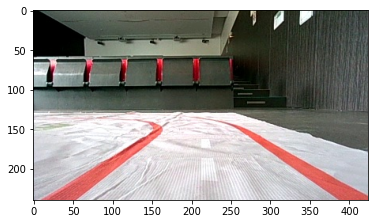

In [34]:
image = cv2.imread("assets/Image1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

2. **_HSV Thresholding_** - To accurately extract the pixels containing any lane information, thresholding methods have been applied on the pixel level working on 3 channels of the feature vector - namely the Red, Green and Blue components. The input video is transformed from the BGR colorspace to HSV colorspace and then filtered according to the predetermined Hue Component Thresholds . This is done to extract the specific colour of lane markings within a HSV range of [0, 75, 70] to [200, 175, 240]. This filter reduces the possibility of detecting other straight lines which may not be lane markings, or in other words works better in filtering coloured lane markings.

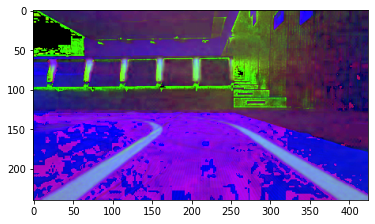

In [35]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)
plt.show()

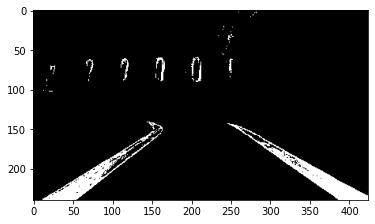

In [36]:
filtered_hsv = cv2.inRange(hsv_image, lower_threshold, upper_threshold)
plt.imshow(filtered_hsv, cmap="gray")
plt.show()

3. **_Gaussian Blur_** - The smoothing step needed for removing high frequency details and for reducing noise such as road surface irregularities, gaps in lane markings and sensor noise. A kernel size of 15 used for filtering the input frames with Gaussian Blur in our case.

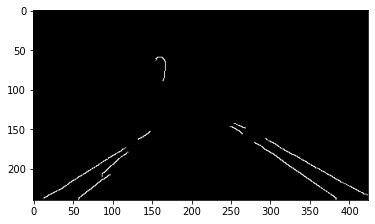

In [37]:
blur = cv2.GaussianBlur(filtered_hsv, (kernel_size, kernel_size), 0)
edges = cv2.Canny(blur, threshlow, threshhigh)
plt.imshow(edges, cmap="gray")
plt.show()

4. **_Region of Interest_** - To prevent false detections and isolate the image space in only relevant parts of the image coordinate space, a region of interest is cropped out and henceforth used for processing.

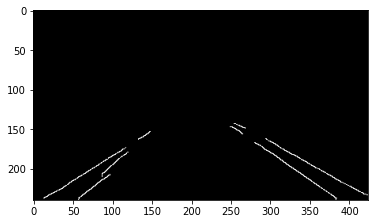

In [38]:
mask = np.zeros_like(edges)
cv2.fillPoly(mask, rs_mask_vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)
plt.imshow(masked_edges, cmap="gray")
plt.show()

5. **_Hough Transform_** - Used to identify the lines which represent lane markings. Step comprises of thresholding the accumulated values from the parameter space representation of the edge pixels having straight lines. The detections above the threshold are straight lines in our application.

In [39]:
lines = cv2.HoughLinesP(masked_edges, rho, theta, vote_threshold, np.array([]),min_linelength, max_linegap) 

6. **_Filtering_** - The Lines obtained by Hough Transform are transformed to BEV pesperctive using _pesperctive_transformation_ method. Then the transformed lines are extrapolated using def _extrapolate_line_ to ensure that the lines extend until the bottom of the image that will be used further as a reference. Finally, combining the features of Hough and Transformed lines, empirical conditions are used to determine if the line belongs to the left or right side and store them in their respective list. However, if a line doesn't fulfill any condition, it will be discarded.

In [40]:
def pesperctive_transformation(lane):
        yc = 0.5 * rs_image_height
        yc = 120
        if not lane is None and len(lane):

            xp = np.array([lane[0], lane[2]])
            yp = np.array([lane[1], lane[3]])
            xp = 0.5 * rs_image_width + yc * (xp - rs_image_width / 2) / (
                        yp - yc)
            yp = rs_image_height - focal_length_px * (rs_image_height - yp) / (yp - yc)
            lane_tr = [xp[0], yp[0], xp[1], yp[1]]
        
        else:

            lane_tr = []

        return lane_tr

In [41]:
def extrapolate_line(x_points,y_points):

        parameters = np.polyfit(x_points, y_points, 1)
        slope = parameters[0]
        y_int = parameters[1]
        ym = -500
        xm = int((ym - y_int) / slope)
        yh = rs_image_height
        xh = int((yh - y_int) / slope)
        angle = math.atan(slope)
        if slope < 0:

            angle += math.radians(180)

        return np.array([xh,yh,xm,ym,angle])

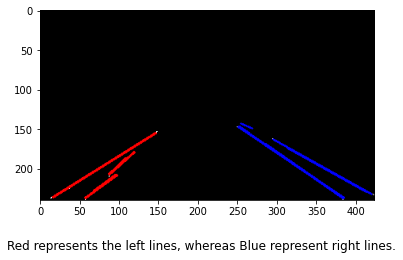

In [42]:
edges_with_detected_lines = np.stack((masked_edges,) * 3, axis=-1) 

left_lines_tr_arr = []
right_lines_tr_arr = []
right_lines_arr = []
left_lines_arr = []

if not lines is None:
    for line in lines:
        
        
        line = line[0].astype(float)
        slope = (line[2]-line[0])/ (line[3]-line[1])
        tr_line = pesperctive_transformation([line[0], line[1], line[2], line[3]])
        extrap_line = extrapolate_line((tr_line[0],tr_line[2]),(tr_line[1],tr_line[3]))

        if abs(extrap_line[4]) > 0.7854:

            if slope <= 0 and line[0] < 240 and extrap_line[0] < 212 and extrap_line[0] * math.sin(extrap_line[4]) > -300:

                left_lines_tr_arr.append([tr_line[0], tr_line[1], tr_line[2], tr_line[3]])
                cv2.line(edges_with_detected_lines, (int(line[0]), int(line[1])), (int(line[2]), int(line[3])),(255, 0, 0), 2)
                
            elif  slope >0 and line[2] > 180 and extrap_line[0] >= 212 and  extrap_line[0]* math.sin(extrap_line[4]) < 550:

                right_lines_tr_arr.append([tr_line[0], tr_line[1], tr_line[2], tr_line[3]])
                cv2.line(edges_with_detected_lines, (int(line[0]), int(line[1])), (int(line[2]), int(line[3])),(0, 0, 255), 2)
                
            else:
                
                cv2.line(edges_with_detected_lines, (int(line[0]), int(line[1])), (int(line[2]), int(line[3])),(255, 255, 0), 2)
           
plt.imshow(edges_with_detected_lines)
txt= "Red represents the left lines, whereas Blue represent right lines."
plt.figtext(0.5, 0.0, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

7. **_Merging_** - The Lines are merged by averaging each list with respect to axis 0. As a result a single line that represents a lane.

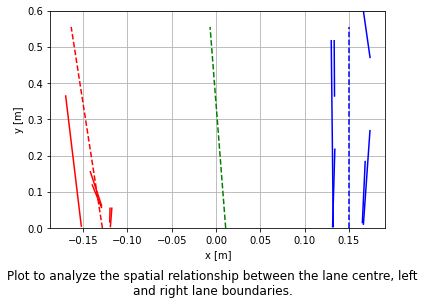

In [43]:
def merge_lines(lines_array):

    if lines_array.shape[0] > 0:

        merged_line = np.average(lines_array, axis=0)
        extrap_line = extrapolate_line((merged_line[0],merged_line[2]),(merged_line[1],merged_line[3]))

    else:

        extrap_line = np.array([])

    return extrap_line

#This function is used only to help with data visualization  
def convert2meters(line):
    
    x1 = pixel_to_meter * (line[0] - rs_image_width/2)
    y1 = -pixel_to_meter * (line[1] - rs_image_height)
    x2 = pixel_to_meter * (line[2] - rs_image_width/2)
    y2 = -pixel_to_meter * (line[3] - rs_image_height)
    
    return [x1,y1,x2,y2]
    
left_lane = merge_lines(np.array(left_lines_tr_arr))
right_lane = merge_lines(np.array(right_lines_tr_arr))

#Plot the filtered transformed lines
for line in left_lines_tr_arr:

    line = convert2meters(line)
    plt.plot((line[0],line[2]),(line[1],line[3]),'r')
    
for line in right_lines_tr_arr:

    line = line = convert2meters(line)
    plt.plot((line[0],line[2]),(line[1],line[3]),'b')

#Convert from Pixels to meters to better data visualization
left_lane_meters = convert2meters(left_lane)   
right_lane_meters = convert2meters(right_lane)
centre_lane_meters = np.array([left_lane_meters,right_lane_meters])
centre_lane_meters = np.average(centre_lane_meters, axis = 0)

plt.plot((left_lane_meters[0],left_lane_meters[2]),(left_lane_meters[1],left_lane_meters[3]),'--r')
plt.plot((right_lane_meters[0],right_lane_meters[2]),(right_lane_meters[1],right_lane_meters[3]),'--b')
plt.plot((centre_lane_meters[0],centre_lane_meters[2]),(centre_lane_meters[1],centre_lane_meters[3]),'--g')
plt.ylim(0.0,0.6)
plt.xlabel("x [m]")
plt.ylabel("y [m]")
txt= "Plot to analyze the spatial relationship between the lane centre, left and right lane boundaries."
plt.figtext(0.5, -0.1, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.grid()
plt.show()

8. **_Parameters Extraction_** - Finally, the output of the lane detection pipeline is obtained estimating the lateral deviation and the entry lane angle which are obtained using the available lanes.

In [44]:
def get_deviation_and_yaw():

    parameters = []
    if len(left_lane) > 0:

        parameters.append([left_lane[0],left_lane[4]])

    if len(right_lane) > 0:

        parameters.append([right_lane[0]-xr_offset,right_lane[4]])

    if len(parameters) > 0:

        parameters_np = np.array(parameters)
        parameters_np = np.average(parameters_np, axis=0)
        yaw = parameters_np[1]
        lateral_deviation = pixel_to_meter*parameters_np[0]*math.sin(yaw)
        print("Lateral Deviation :" + str(lateral_deviation) +"m")
        print("Entry Lane Angle" + str(math.degrees(yaw)) + "degrees")
        
get_deviation_and_yaw()

Lateral Deviation :0.01986496668496674m
Entry Lane Angle88.1793579976364degrees


The below subplots summarize the classical approach for lane detection.

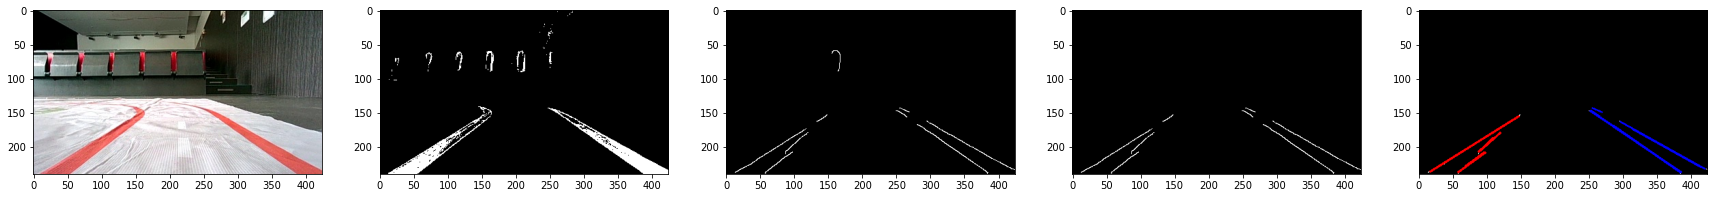

In [45]:
fig = plt.figure(figsize=(30, 6))
#fig = plt.figure()
ax1 = fig.add_subplot(1,5,1)
ax1.imshow(image, cmap = 'gray')
ax2 = fig.add_subplot(1,5,2)
ax2.imshow(filtered_hsv, cmap = 'gray')
ax3 = fig.add_subplot(1,5,3)
ax3.imshow(edges, cmap = 'gray')
ax4 = fig.add_subplot(1,5,4)
ax4.imshow(masked_edges, cmap = 'gray')
ax1 = fig.add_subplot(1,5,5)
ax1.imshow(edges_with_detected_lines)

### 4.2 Lane Detection (Inverse Perspective Mapping)

**_Inverse Perspective Mapping_** - To get an overhead Birds-Eye-View of the path ahead using only the forward camera view, a transform of perspective was required. This was done using IPM. IPM transforms the lane and path image pixels into 2D road coordinates for distortion free lane geometry and motion planning using the following coordinate and parametric matrices:
* Camera Projection Matrix consisting of Extrinsic and Intrinsic Matrices  
    $$P = K[R|t]$$
* World Coordinate Matrix  
    $$M=\begin{pmatrix}
1&0&0&0\\
0&1&0&0\\
0&0&0&0\\
0&0&0&1
\end{pmatrix},$$
    Now, there exists a combined perspective mapping **(𝑃𝑀)⁻¹** that transforms image coordinates to road coordinates

Input


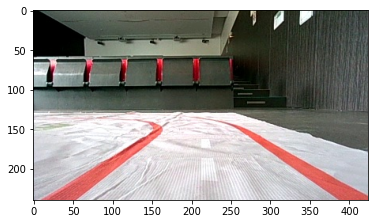

Output


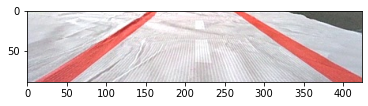

In [46]:
def get_masked_image(img, boundaries = [150,0]):
    img_size = img.shape
    height_limit = boundaries[0]
    width_limit = boundaries[1]
    masked_img = img[height_limit:img_size[0],width_limit:img_size[1]]
    return masked_img

print("Input")
plt.imshow(image)
plt.show()
print("Output")
masked_img = get_masked_image(image)
plt.imshow(masked_img)
plt.show()

1. **_Warp Matrix_** - Get warp matrix to perform BEV IPM using source and destination points *(Need to be run once just to extract the warp matrix)*.
Source and Destination points are selected from the image. These are then used to determine the warp matrix using *cv2.getPerspectiveTransform()* function. Here the source and detsination points are highlighted by the green circles on the images. 


Input


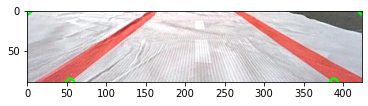

Transformation matrix =
 [[1.         6.17681159 0.        ]
 [0.         3.63043478 0.        ]
 [0.         0.02922705 1.        ]]

BEV Output


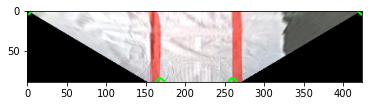

In [47]:
masked_h, masked_w,_ = masked_img.shape
#Set source points and the destination points(desired location after transformation)

src = np.float32([[54,masked_h],[0,0],[masked_w,0],[388,masked_h]])
dst = np.float32([[168,masked_h],[0,0],[masked_w,0],[260,masked_h]]) 

#Extract M matrix using cv2.getPerspectiveTransform function
M = cv2.getPerspectiveTransform(src, dst)

#Visualise the transformation
warped_img = cv2.warpPerspective(masked_img, M, (masked_w, masked_h))
for s in src :
    cv2.circle(masked_img, center=(int(s[0]),int(s[1])), radius=5, color = (0, 255, 0), thickness = 2)
for d in dst:
    cv2.circle(warped_img, center=(int(d[0]),int(d[1])), radius=5, color = (0, 255, 0), thickness = 2)

print("Input")
plt.imshow(masked_img)
plt.show()
print("Transformation matrix =\n", M)
print("\nBEV Output")
plt.imshow(warped_img)
plt.show()

2. **_Get BEV image_** - A function *get_ipm_image()* has been created to use the warping matrix determined in the above step to transfrom front view images to bird's eye view images.

Input


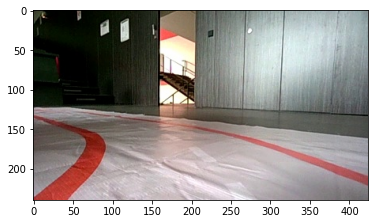

Output


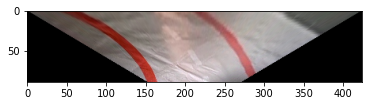

In [48]:
def get_ipm_image(masked_img):
    masked_img_shape = masked_img.shape
    M = np.array([[1.,6.17681159,0.],
                  [0.,3.63043478,0.],
                  [0.,0.02922705,1.]])
    ipm_img = cv2.warpPerspective(masked_img, M, (masked_img_shape[1], masked_img_shape[0]))
    return ipm_img

image = cv2.imread('assets/Image2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
masked_img = get_masked_image(image)
warped_img = get_ipm_image(masked_img)
print("Input")
plt.imshow(image)
plt.show()
print("Output")
plt.imshow(warped_img)
plt.show()

3. **_Saturation Thresholding_** - Isolate the lanes using saturation image. During experiments it was found that the saturation image can be used to isolate the orange lanes from the gray background. Hence, to reduce the number of steps a thresholding was applied on the saturation image. 

Input


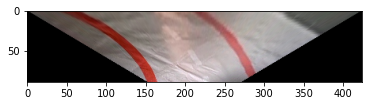

Output


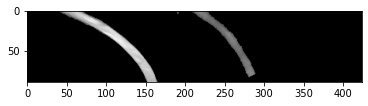

In [49]:
def get_saturation_img(img):
    hsv_img = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
    hsv_img[hsv_img<80]=0 #threshold for saturation values
    return hsv_img[:,:,1]

sat_img = get_saturation_img(warped_img)
print("Input")
plt.imshow(warped_img)
plt.show()
print("Output")
plt.imshow(sat_img, cmap="gray")
plt.show()

4. **_Sliding Window Search_** - Determine the starting locations of left and right lanes using Histogram. Use Sliding Window to capture the pixels belonging to left and right lanes and then determine the center lane

In [50]:
def get_histogram_img(img):
    img_bin = np.zeros_like(img)
    img_bin[(img > 0)] = 1
    # a boundary of 60 is used to further reduce the ROI in the y direction to prevent errors due to misdetection of environment object
    histogram = np.sum(img_bin[60:,:], axis=0)  
    
    return histogram

histogram = get_histogram_img(sat_img)
#plt.plot(histogram)
#plt.show()

midpoint = histogram.shape[0]//2
left_x = np.argmax(histogram[:midpoint])  # x-position for the left lane
right_x = np.argmax(histogram[midpoint:]) + midpoint  # x-position for the right lane
    
print("Left Starting Point: ",left_x," Right Starting Point: ",right_x)

Left Starting Point:  151  Right Starting Point:  280


Detected Lanes - Left Found, Right Found

Sliding Window Process Visualisation


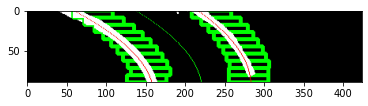

BEV of detected lanes


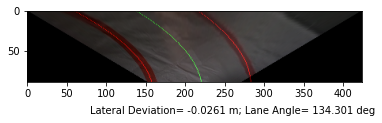

In [51]:
def find_lane(img, mode=2,show=False):

    # Create a binary version of the warped image
    warped_bin = np.zeros_like(img)
    warped_bin[(img > 0)] = 1
    
    vis_img = img.copy()  # The image we will draw on to show the lane-finding process
    vis_img = cv2.cvtColor(vis_img,cv2.COLOR_GRAY2RGB)
    vis_img[vis_img > 0] = 255  # Max out non-black pixels so we can remove them later
    
    # Find the left an right right peaks of the histogram
    histogram = get_histogram_img(img)
    midpoint = histogram.shape[0]//2
    left_x = np.argmax(histogram[:midpoint])  # x-position for the left window
    right_x = np.argmax(histogram[midpoint:]) + midpoint  # x-position for the right window

    # Sliding Window Method  
    n_windows = 10
    win_height = warped_bin.shape[0]//n_windows
    margin = 25  # Determines how wide the window is 25
    pix_to_recenter = 50  # If we find this many pixels in our window we will recenter (too few would be a bad recenter)10

    # Find the non-zero x and y indices
    nonzero_ind = warped_bin.nonzero()
    nonzero_y_ind = np.array(nonzero_ind[0])
    nonzero_x_ind = np.array(nonzero_ind[1])

    left_line_ind, right_line_ind = [], []

    for win_i in range(n_windows):
        # Determine window corner points
        win_y_low = warped_bin.shape[0] - (win_i+1)*win_height
        win_y_high = warped_bin.shape[0] - (win_i)*win_height
        win_x_left_low = max(0, left_x - margin)
        win_x_left_high = left_x + margin
        win_x_right_low = right_x - margin
        win_x_right_high = min(warped_bin.shape[1]-1, right_x + margin)

        # Draw the windows on the vis_img
        rect_color, rect_thickness = (0, 255, 0), 3
        cv2.rectangle(vis_img, (win_x_left_low, win_y_high), (win_x_left_high, win_y_low), rect_color, rect_thickness)
        cv2.rectangle(vis_img, (win_x_right_low, win_y_high), (win_x_right_high, win_y_low), rect_color, rect_thickness)

        # Record the non-zero pixels within the windows
        left_ind = (
            (nonzero_y_ind >= win_y_low) &
            (nonzero_y_ind <= win_y_high) &
            (nonzero_x_ind >= win_x_left_low) &
            (nonzero_x_ind <= win_x_left_high)
        ).nonzero()[0]
        right_ind = (
            (nonzero_y_ind >= win_y_low) &
            (nonzero_y_ind <= win_y_high) &
            (nonzero_x_ind >= win_x_right_low) &
            (nonzero_x_ind <= win_x_right_high)
        ).nonzero()[0]
        left_line_ind.append(left_ind)
        right_line_ind.append(right_ind)

        # If there are enough pixels, re-align the window
        if len(left_ind) > pix_to_recenter:
            left_x = int(np.mean(nonzero_x_ind[left_ind]))
        if len(right_ind) > pix_to_recenter:
            right_x = int(np.mean(nonzero_x_ind[right_ind]))

    # Combine the arrays of line indices
    
    if((np.max(histogram[:midpoint])==0)):
        left_line_ind = []
    else:
        left_line_ind = np.concatenate(left_line_ind)

    if((np.max(histogram[midpoint:])==0)):
        right_line_ind = []
    else:    
        right_line_ind = np.concatenate(right_line_ind)

    # Gather the final line pixel positions
    left_x = nonzero_x_ind[left_line_ind]
    left_y = nonzero_y_ind[left_line_ind]
    right_x = nonzero_x_ind[right_line_ind]
    right_y = nonzero_y_ind[right_line_ind]     

    # Color the lines on the vis_img
    vis_img[left_y, left_x] = 254  # 254 so we can isolate the white 255 later
    vis_img[right_y, right_x] = 254  # 254 so we can isolate the white 255 later

    y_vals = np.linspace(0, warped_bin.shape[0]-1, warped_bin.shape[0])
    middle_y_vals = [int(a) for a in y_vals]

    if len(left_x) == 0:
        lflag=0
    else:
        lflag=1
        if mode == 2:
            left_fit = np.polyfit(left_y, left_x, 2)
            left_x_vals = left_fit[0]*y_vals**2 + left_fit[1]*y_vals + left_fit[2]
        else:
            left_fit = np.polyfit(left_y, left_x, 1)
            left_x_vals = left_fit[0]*y_vals + left_fit[1]
    if len(right_x)== 0:
        rflag=0
    else:
        rflag=1
        if mode == 2:
            right_fit = np.polyfit(right_y, right_x, 2)
            right_x_vals = right_fit[0]*y_vals**2 + right_fit[1]*y_vals + right_fit[2]
        else:
            right_fit = np.polyfit(right_y, right_x, 1)
            right_x_vals = right_fit[0]*y_vals + right_fit[1]

    if(rflag==1)and(lflag==1):
        if((right_x_vals[-1]-left_x_vals[-1])<=45):
            temp = (right_x_vals[-1]+left_x_vals[-1])*0.5
            if temp < 212:
                rflag=0
            else:
                lflag=0
    
    if (rflag == 0):
        print('Detected Lanes - Left Found, Right Not Found')
        middle_x_vals = left_x_vals+60
        middle_x_vals = [int(a) for a in ((middle_x_vals))]
        left_x_vals = [int(a) for a in (left_x_vals)]
        vis_img[middle_y_vals, left_x_vals] = [250,0,0]
        vis_img[middle_y_vals, middle_x_vals] = [0,250,0]
    elif (lflag == 0):
        print('Detected Lanes - Left Not Found, Right Found')
        middle_x_vals = right_x_vals-60
        middle_x_vals = [int(a) for a in ((middle_x_vals))]
        right_x_vals = [int(a) for a in (right_x_vals)]
        vis_img[middle_y_vals, right_x_vals] = [250,0,0]
        vis_img[middle_y_vals, middle_x_vals] = [0,250,0]
    else:
        print('Detected Lanes - Left Found, Right Found')
        middle_x_vals = (left_x_vals+right_x_vals)/2
        middle_x_vals = [int(a) for a in ((middle_x_vals))]
        left_x_vals = [int(a) for a in (left_x_vals)]
        right_x_vals = [int(a) for a in (right_x_vals)]
        vis_img[middle_y_vals, left_x_vals] = [250,0,0]
        vis_img[middle_y_vals, right_x_vals] = [250,0,0]
        vis_img[middle_y_vals, middle_x_vals] = [0,250,0]

    if show:
        print("\nSliding Window Process Visualisation")
        plt.imshow(vis_img)
        plt.show()

    lane_lines_img = vis_img.copy()
    lane_lines_img[lane_lines_img >= 253] = 0  # This basically removes everything except the colored lane lines
    lane_lines_img = cv2.addWeighted(lane_lines_img, 0.6, warped_img, 0.4, 0.0)

    return lane_lines_img, vis_img, middle_x_vals, middle_y_vals, left_x_vals,right_x_vals


lane_lines_img, vis_img, middle_x_vals, middle_y_vals,_,_ = find_lane(sat_img,2,True)

## Function to get lane angle
def get_lane_angle(x,y):
    y= np.flip(y)
    fit_cr = np.polyfit(x, y, 1)
    angle = np.rad2deg(np.arctan2(fit_cr[0],1)) 
    if angle<0:
        angle+=180
    return np.round(angle,3)

## Function to get lateral deviation
def get_deltax(x,lane_lines_img):
    pixeltometer=0.00326
    delta_x = (lane_lines_img.shape[1]/2)-x[-1]
    return np.round(delta_x*pixeltometer,4)

angle = get_lane_angle(middle_x_vals,middle_y_vals)
lateral_deviation = get_deltax(middle_x_vals,lane_lines_img)

print("BEV of detected lanes")
plt.imshow(lane_lines_img)
plt.text(80,130,"Lateral Deviation= "+str(lateral_deviation)+" m; Lane Angle= "+str(angle)+" deg", fontsize = 10)
plt.show()


In [52]:
def lane_detect_ipm_pipeline(img):
    masked_img = get_masked_image(image)
    warped_img = get_ipm_image(masked_img) 
    sat_img = get_saturation_img(warped_img)
    lane_lines_img,_, middle_x_vals, middle_y_vals,rightx,leftx = find_lane(sat_img,2,False)
    angle = get_lane_angle(middle_x_vals,middle_y_vals)
    lateral_deviation = get_deltax(middle_x_vals,lane_lines_img)

    return lane_lines_img,middle_x_vals,middle_y_vals,rightx,leftx,angle,lateral_deviation

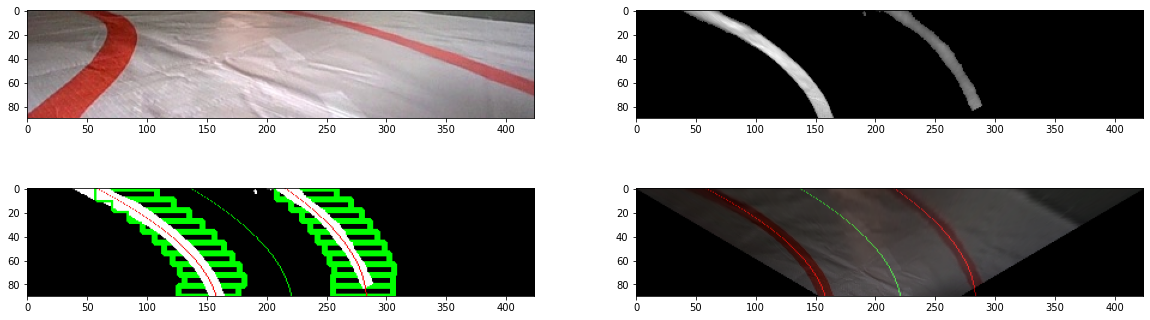

In [53]:
fig = plt.figure(figsize=(20,6))
#fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(masked_img)
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(sat_img,cmap='gray')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(vis_img)
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(lane_lines_img)

5. **_Plot for Lane Measurements_**

In [54]:
def plot_lane_in_cm(rightx,leftx,middle_x_vals,middle_y_vals): 
    angle = get_lane_angle(middle_x_vals,middle_y_vals)
    angle = np.round(angle,2)
    pxtocm = 30/92
    rxvals = np.array([x*pxtocm for x in np.flip(rightx)])
    lxvals = np.array([x*pxtocm for x in np.flip(leftx)])
    mxvals = np.array([x*pxtocm for x in np.flip(middle_x_vals)])

    mcmxvals=mxvals-mxvals[0]
    lcmxvals=lxvals-mxvals[0]
    rcmxvals=rxvals-mxvals[0]

    cmyvals = [y for y in middle_y_vals]

    plt.scatter(rcmxvals,cmyvals)
    plt.scatter(mcmxvals,cmyvals)
    plt.scatter(lcmxvals,cmyvals)

    plt.xlabel("x [cm]")
    plt.ylabel("y [cm]")
    plt.legend(["Left lane", "Desired Trajectory", "Right Lane"])
    plt.text(5, 100, "Lane Angle="+str(angle)+" deg", fontsize = 10)
    plt.grid()
    plt.show()



Detected Lanes - Left Found, Right Found


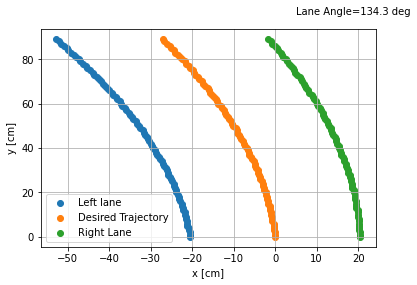

In [55]:
image = cv2.imread('assets/Image2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
lane_lines_img,middle_x_vals,middle_y_vals,rightx,leftx,angle,lateral_deviation = lane_detect_ipm_pipeline(image)
plot_lane_in_cm(rightx,leftx,middle_x_vals,middle_y_vals)

#### 4.3 Vehicle Guidance Control

The vehicle guidance algorithm responsible for safely navigating along paths in our project has been developed using a controller based approach. A controller based approach was simpler and feasible to implement for our case as compared to a Pure Pursuit path based algorithm for example.

The controller development consisted of coming up with the architecture to satisfy our requirements of correcting the lateral deviation and restricting deviation of angle to be steered with the lane entry angle.
An additional factor to give more weight to the angle correction was multiplied which is the vehicle speed factor.
This was done to have a more significant controller response to quicker and larger angle curvatures, which happen for instance at higher vehicle speeds. 

Hence, our controller transfer function now formulates to:

$$ Y or  α_s = K_DL_D + K_P v  \frac{dL_D}{dt} $$

where  $$ \frac{dL_D}{dt} = v \cos(α) $$

L<sub>D</sub> - Lateral Deviation

α, α<sub>s</sub> - lane entry angle and command steering angle respectively

K<sub>P</sub>, K<sub>D</sub> are P controller and D controller gains respectively


The input to the guidance control system are the Lateral deviation, lane entry angle which are coming from the Lane detection system, besides longitudinal vehicle speed. Additionally a PI controller was implemented for the vehicle speed correction. This PI controller reduces some mismatch between set vehicle speed and wheel speed due to factors such as battery discharge, friction and surface resistance.The PD Controller output is then used for the actuation of the steering wheel. This allows the vehicle to navigate autonomously along turns or straights encountered and is the main idea for the guidance control algorithm. 

The following control block diagram diagram outlines the control system:

<div style="text-align:center">
    <img src="assets/PIPDflow.png" width="800" height="400"/>
    <figcaption>Fig. 3 Controller Block Diagram</figcaption>
</div>.

The controllers parameters were selected experimentally. The controllers response for one lap is shown below.

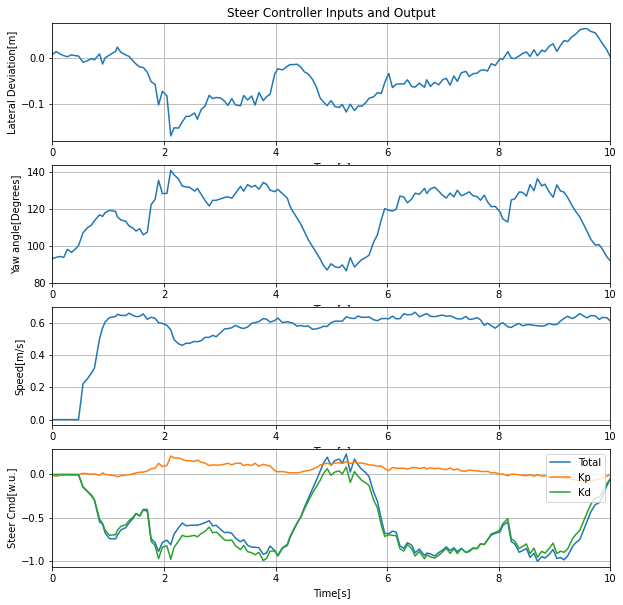

In [56]:
results = pd.read_csv("assets/results.csv")
results["cos"] = results["yaw"].apply(math.cos)
results["yaw"] = results["yaw"].apply(math.degrees)
results["steer_kd"] = 2.25* results.speed *results.cos
results["steer_kp"] = -1.25*results.deviation



plt.figure(1, figsize=(10, 10))
plt.subplot(4, 1, 1)
plt.title("Steer Controller Inputs and Output")
plt.ylabel("Lateral Deviation[m]")
plt.plot(results.time,results.deviation)
plt.xlim(0,10)
plt.xlabel("Time[s]")
plt.grid()

plt.subplot(4, 1, 2)
plt.ylabel("Yaw angle[Degrees]")
plt.xlim(0,10)
plt.plot(results.time,results.yaw)
plt.xlabel("Time[s]")
plt.grid()

plt.subplot(4, 1, 3)
plt.ylabel("Speed[m/s]")
plt.xlim(0,10)
plt.plot(results.time,results.speed)
plt.xlabel("Time[s]")
plt.grid()

plt.subplot(4, 1, 4)
plt.ylabel("Steer Cmd[w.u.]")
plt.xlim(0,10)
plt.plot(results.time,results.steer_cmd)
plt.plot(results.time,results.steer_kp)
plt.plot(results.time,results.steer_kd)
plt.legend(["Total","Kp","Kd"], loc='upper right')
plt.xlabel("Time[s]")
plt.grid()

plt.show()

The plot above shows that the selected PI parameters allow the vehicle to keep a stable solution even on an uneven surface. About steering control the derivative component has a much bigger weight than the proportional in the total steer command, the reason for that is the map where it was performed the parameters tunning has short straight sections and narrow curves.

### 4.4 ROS Architecture

For implementing the code described algorithm, a ROS package called visual_lane_following was created. The package has two nodes:

- **_deviation_publisher_**: It performs the vehicle perception. It subscribes on /ika_racer/perception/realsense/camera/color/image_raw topic and performs the lane detection. The extracted features are published on /ika_racer/lane_visual_following/lane_deviation topic.
- **_lane_folloer_**: It execute vehicle navigation. It subscribes on  /ika_racer/lane_visual_following/lane_deviation and /ika_racer/perception/encoder/speed_filtered topics and implement two controllers, one for the longitudinal speed and the other for the steering. The outputs of both controllers are published on /ika_racer/locomotion/drive_command topic.

The communication between the nodes is done via the /ika_racer/lane_visual_following/lane_deviation topic which has a  custom ROS message *LaneMsg.msg*. The data structure of the message is described bellow:

* float32[] left_lane
* float32[] right_lane
* float32 lateral_deviation
* float32 yaw

The code of the **_deviation_publisher_** node is already presented in the Lane Detection section. The controllers implentation in **_lane_folloer_** node is decribed bellow.

```  
def vehicle_controller(self):

        if self.initial_time_flag:
            self.previous_time = rospy.get_time()
            self.initial_time_flag = False

        speed_error = self.target_speed - self.current_speed 
        current_time = rospy.get_time()
        self.int_error_speed += speed_error*(current_time - self.previous_time)
        self.previous_time = current_time
        speed_cmd = self.ki_speed*self.int_error_speed + self.kp_speed*speed_error 
        steer_cmd = self.kp_steer*self.lateral_deviation + self.kd_steer* self.current_speed *math.cos(self.yaw)
        
        speed_cmd = np.clip(speed_cmd, 0, 1)
        steer_cmd = np.clip(steer_cmd, -1, 1)
        self.drive_cmd.drive.speed = speed_cmd
        self.drive_cmd.drive.steering_angle = steer_cmd
        if rospy.get_time() - self.lane_timeout > 0.5:
            print("NO LANE TIMEOUT")
            self.drive_cmd.drive.speed = 0.0
            self.drive_cmd.drive.steering_angle = 0.0

        self.drive_cmd_pub.publish(self.drive_cmd)


```

## 5. Experiments and Evaluations

The hardware and physical nature of this research project with the scaled Automated Vehicle calls for mainly driving and track-based experiments for validation and testing. Appropriate analysis techniques and experiments were researched and designed for reporting qualitative and quantitative metrics after the testing phase. The experiments were conducted keeping in mind the testing of the robustness our vehicle's lane following capability.  

Challenging scenarios with different environmental conditions have been created for testing within the ODD of the project:
* Dynamic Lighting Conditions
* Lane Marking visibility (one or no lane, occlusion, degradation)
* Varying the initial vehicle position
* Varied vehicle speeds at turns

As seen by our ODD, the vehicle size, road conditions and smaller geometry are unique. Quantitative evaluation was not possible as we would need a lot of manual effort and time for annotating images due to the unavailability of labels for ground truth.



### 5.1 Path Trace Experiment

Graphing the total path to investigate consistency followed by detection graphing on an x-y grid of the lane detection at different lighting and speeds. The observations are a straight and curve path plotted on an x-y grid plot over a single frame to analyze the spatial relationship between the lane centre, left and right lane boundaries.
<div style="text-align:center">
    <img src="assets/PathTrace.jpg" width="800" height="400"/>
    <figcaption>Fig. 4 Path Trace.</figcaption>
</div>

### 5.2 Qualitative Analysis of Illumination Robustness.

Experiment to evaluate how well the vehicle can follow straights and curves. The vehicle was able to follow its path and did not break the trajectory wherein it is known that the lane detection faced breaks in its right input lane markings in the experiment

<div style="text-align:center">
<video controls muted autoplay loop width="848"
       src="assets/robustness_in_different_light_conditions_with_ld_and_ang.mp4"  
       controls>
</video>
    <figcaption>Vid. 1 Lane Detection</figcaption>
</div>

### 5.3 Measurement Accurancy:
- Error in deviation – difference between true deviation and measured deviation
- Error in Lane Entry Angle Detection α

The aim is to measure the amount of offset of the vehicle from the lane centre or the lateral deviation from the centre. Aspects such as:
(1) Maximum lateral deviation
(2) Mean Squared Error of Lateral deviation
(3) Mean Squared Error of Lane Angle detection

| True Angle of Lane | Measured Angle of Lane (Degree) |
| ------------------ | ------------------------------- |
| 135                | 131.7802929                     |
| 120                | 120.8940948                     |
| 90                 | 89.38141604                     |
| 60                 | 61.87944187                     |
| 45                 | 53.28507495                     |
<div style="text-align:center">
Table 1: Measured and True Lane Angles

| True Lateral deviation by (cm) | Measured Lateral Deviation by Vehicle (cm) |
| ------------------------------ | ------------------------------------------ |
| 9.2                            | 9±0.3                                      |
| 14.7                           | 12.9±0.1                                   |
| 0                              | 0.5±0.2                                    |
| \-3.3                          | \-3.8±0.4                                  |
| \-10.2                         | \-10.5±0.5                                 |
<figcaption>Table 2: Measured and True Lateral Deviations</figcaption>        


The MSEs were recorded at:  
**Lateral Deviation Measurement MSE = 0.914  
Lane Entry Angle Measurement MSE = 15.44**



### 5.4 Qualitative Analysis of Lane Detection

We were able to see better good results of the lane detection performance on our track. Due to unavailability of benchmark ground truth or annotated data in the same scale as ours, numerical metric data on the performance could not be computed. The algorithm itself has been developed around our use case involving the scale and field of view. However, lane detection accuracy and computation speed are at par to successfully help the control algorithm make decisions in realtime. 

It was visually seen to that the accuracy between the true lane markings and the detected lane as well as the spatial deviation between the true lane markings and the detected lane inlays, as high and very low respectively. With this and the low latency in detection the classical approach has served well to help the control algorithm make decisions in realtime and navigate paths.

<div style="text-align:center">
<video controls autoplay loop width="1020"
       src="assets/IPMcivil1.mp4"  
       controls>
</video>
<div style="text-align:center">
<video controls autoplay loop width="510"
       src="assets/IPMcivil2.mp4"  
       controls>
    
</video>
    <figcaption>Vid. 2 Input view and its IPM</figcaption>
</div>

Detected Lanes - Left Found, Right Found


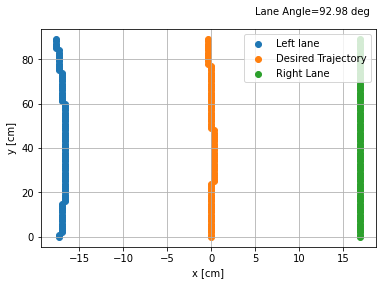

In [57]:
image = cv2.imread('assets/Image1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
lane_lines_img,middle_x_vals,middle_y_vals,rightx,leftx,angle,lateral_deviation = lane_detect_ipm_pipeline(image)
plot_lane_in_cm(rightx,leftx,middle_x_vals,middle_y_vals)

Detected Lanes - Left Found, Right Found


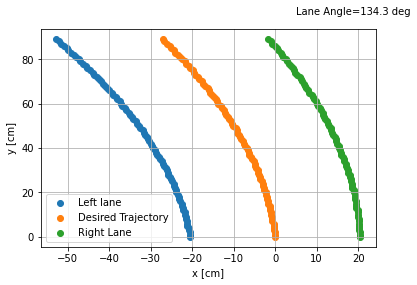

In [58]:
image = cv2.imread('assets/Image2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
lane_lines_img,middle_x_vals,middle_y_vals,rightx,leftx,angle,lateral_deviation = lane_detect_ipm_pipeline(image)
plot_lane_in_cm(rightx,leftx,middle_x_vals,middle_y_vals)

#### 5.5 Vehicle Speed Robustness

This experiment is to dedicated to measure the robustness of the system to higher speeds. Higher vehicle speeds may affect perception capability and consequent delays in steering commands can change trajectory.
In this experiment, the following relationships are drawn as seen in the table:

1- Time taken to cover a complete lap at different vehicle speeds.  
2- Within this, how many occurrences of lane boundary touches have been found.  
3- Average speed for least no. of lane line touches.

| Speed[m/s] + Scenario    | Time[s] taken for 1 lap | Time[s] taken for 5 laps | Boundary Runoff in 1 lap | Boundary Runoff in 5 laps |
| ------------------- | -------------------- | --------------------- | ------------------------ | ------------------------- |
| 0.6 Clockwise       | 10.87                | 55.13                 | 0                        | 1                         |
| 0.6 Anti-Clockwise  | 11.36                | 53.44                 | 0                        | 0                         |
| 0.65 Anti-Clockwise | 9.52                 | 48.53                 | 0                        | 2                         |
| 0.7 Anti-Clockwise  | 9.09                 | 45.08                 | 1                        | 5                         |
<div style="text-align:center">
Table 3: Time Taken and Lane Departures at different Speed and Directions

<Axes: xlabel='speed_scenarios'>

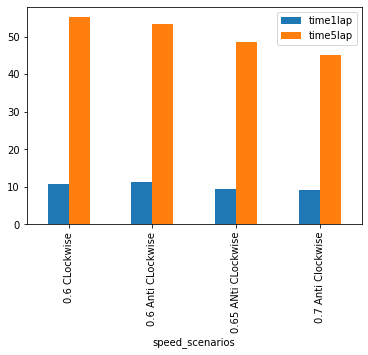

In [61]:
df=pd.DataFrame({
    "speed_scenarios":['0.6 CLockwise','0.6 Anti CLockwise','0.65 ANti CLockwise', '0.7 Anti Clockwise'],
    "time1lap": np.array((10.87,11.36,9.52,9.09)),
    "time5lap": np.array((55.13,53.44,48.53,45.08))
})
df.plot(x="speed_scenarios", y=["time1lap","time5lap"],kind="bar")

## 6. Conclusion

In Conclusion to this research project, we were able to demonstrate achieving the goal of lane following for the scaled vehicle. The provided scaled automated vehicle at the end of the research project runs a python based Lane Detection Algorithm with good performance, paired with a suitable Vehicle Control Algorithm. A controller based algorithm was implemented in order to have the best combination of necessary steering angles and reduction in lateral deviation from the lane centre for our track.  

There is sufficient confidence that the algorithms developed will allow the vehicle to perform well on other scaled tracks, including dynamic factors such as illumination, vehicle speeds and track surface interferences. However, more testing remains. 

Quantitative and Qualitative investigations for both the Lane Detection and Vehicle Control Algorithm yielded evaluation results showing that the developed algorithms were successful in Accurately detecting lane boundaries and also demonstrating, centering the vehicle throughout the path and negotiating turns and road curvatures successfully. 

We were able to have good convergence rate of Lane Centering due to the incorporating of a PD Controller, minimal number of lane boundary contacts and lane departures were recorded. 

As further scope of the future work of this research project, our plans would have looked like as explained in the following Future Work section.

## 7. Future Work

* Conduct similar to Real world Experiments involving Challenging scenarios for the lane following including impairments to its perception such as Heavy Shadows, Occlusions on road surface, Lane Marking degradation, Illumination
    
* Through more investigations into either the controller gains for the PD controller or other controller approaches, we can aim for better and smoother convergence rates for lane centering and for better turn stability.  

* Explore the possibility to tune the exposure and contrast settings for the input image via the librealsense library parameters. More investigation towards this direction can improve the performance of the lane detection against occlusion of the lane markings due to reflection from the track surface.

* Take into account a lot of dynamic factors to improve tackling multiple scenarios. (Vehicle Dynamics, Road situations).

* Develop more rigorous algorithm Fallback conditions and better parameter tunings.

* Not Relying solely on camera data as not feasible, real vehicles have multiple sensor fusions such as GPS working. Sensor Fusion using IMU for also an e.g. to control Lateral Acceleration

#### References


| # | Year | Authors | Title |
| --- | --- | --- | --- |
| 1 | - | - | [Commission Implementing Regulation (EU) 2019/2144 ](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=pi_com%3AAres%282021%29302456) |
| 2 | 2008 | TJ | [ Lane Departure Warning System - Wikipedia Article ](https://en.wikipedia.org/wiki/Lane_departure_warning_system) |
| 3 | 2014 | Bar Hillel, A., Lerner, R., Levi, D. et al. | [Recent progress in road and lane detection: a survey](https://link.springer.com/article/10.1007/s00138-011-0404-2) |
| 4 | 2018 | Yang Xing; Chen Lv; Long Chen; Huaji Wang; Hong Wang; Dongpu Cao; Efstathios Velenis; Fei-Yue Wang | [Advances in Vision-Based Lane Detection: Algorithms, Integration, Assessment, and Perspectives on ACP-Based Parallel Vision](https://ieeexplore.ieee.org/document/8332138) |
| 5 | 2018 | Yang Xing; Chen Lv; Long Chen; Huaji Wang; Hong Wang; Dongpu Cao; Efstathios Velenis; Fei-Yue Wang | [Advances in Vision-Based Lane Detection: Algorithms, Integration, Assessment, and Perspectives on ACP-Based Parallel Vision ](https://ieeexplore.ieee.org/document/8332138) |
| 6 | 2005 | Kuo Yu Chiu, Sheng-Fuu Lin | [Lane detection using color-based segmentation](https://scholar.nycu.edu.tw/en/publications/lane-detection-using-color-based-segmentation) |
| 7 | 2015 | Brody Huval, Tao Wang, Sameep Tandon, Jeff Kiske, Will Song, Joel Pazhayampallil, Mykhaylo Andriluka, Pranav Rajpurkar, Toki Migimatsu, Royce Cheng-Yue, Fernando Mujica, Adam Coates, Andrew Y. Ng | [An Empirical Evaluation of Deep Learning on Highway Driving](https://arxiv.org/abs/1504.01716) |
| 8 | 2020 | Qin Zou, Hanwen Jiang, Qiyu Dai, Yuanhao Yue, Long Chen, Qian Wang | [Robust Lane Detection from Continuous Driving Scenes Using Deep Neural Network](https://arxiv.org/abs/1903.02193) |
| 9 | 2020 | Yeongmin Ko, Younkwan Lee, Shoaib Azam, Farzeen Munir, Moongu Je | [Key Points Estimation and Point Instance Segmentation Approach for Lane Detection](https://arxiv.org/pdf/2002.06604.pdf) |
| 10 | 2018 | Davy Neven, Bert De Brabandere, Stamatios Georgoulis, Marc Proesmans, Luc Van Gool | [Towards End-to-End Lane Detection: an Instance Segmentation Approach](https://arxiv.org/abs/1802.05591) |
| 11 | - | Adrian Zlocki, Christoph Glasmacher  | - | [Lecture - Automated Driving ika - RWTH Aachen](https://www.ika.rwth-aachen.de/en/studies/lectures/automated-driving.html) |
| 12 | 2016 | Brian Paden∗, Michal Cáp, Sze Zheng Yong, Dmitry Yershov1 and Emilio Frazzoli| [A Survey of Motion Planning and Control Techniques for Self-driving Urban Vehicles](https://arxiv.org/pdf/1604.07446.pdf) |
| 13 | 2017 | Udacity | [Advanced Lane-Detection for Self-Driving Cars](https://github.com/SlothFriend/CarND-Term1-P4/blob/master/pipeline.ipynb) |
| 14 | 2020 | Kushal B. Kusram | [Advanced Lane Detection](https://kushalbkusram.medium.com/advanced-lane-detection-fd39572cfe91) |
| 15 | 2022 | Abhishek Omkar Prasad | [Lane Detection with Steer Assist and Lane Departure Monitoring](https://medium.com/@abhisekprasad8/lane-detection-with-steer-assist-and-lane-departure-monitoring-20653957860f) |
| 16 | 2019 | Soumya | [Lane Line Detection](https://www.kaggle.com/code/soumya044/lane-line-detection) |
| 17 | - | Sai Varma Bahubalendruni | [Lane Detection using Hough Transformation](https://medium.com/@bbssaivarma/lane-detection-using-hough-transformation-72a2173a5916) |
| 18 | 2017 | Matt Hardwick | [https://medium.com/@mrhwick/simple-lane-detection-with-opencv-bfeb6ae54ec0](https://medium.com/@mrhwick/simple-lane-detection-with-opencv-bfeb6ae54ec0 |
| 19 | - | - | [Duckietown - Visual Control](https://github.com/duckietown/duckietown-lx/blob/mooc2022/visual-lane-servoing/notebooks/05-Visual-Servoing/visual_servoing_activity.ipynb) |
| 20 | - | Automatic Addison | [The Ultimate Guide to Real-Time Lane Detection Using OpenCV](https://automaticaddison.com/the-ultimate-guide-to-real-time-lane-detection-using-opencv/) |
| 23 | 2019 | Zou Q, Jiang H, Dai Q, Yue Y, Chen L and Wang Q,  | [Robust Lane Detection From Continuous Driving Scenes Using Deep Neural Networks](https://github.com/qinnzou/Robust-Lane-Detection) |
| 24 | 2022 | Nicolay Huarancay, Mihir Deshpande, Sreekar Lanka, Muskan Agarwal, Anushka Iyer | [Lane Detection: An Instance Segmentation Based Approach](https://medium.com/@mihird97/lane-detection-an-instance-segmentation-based-approach-70f2de203886) |
| 25 | 2021 | Shane Dong- | [Lane Detection Implementation with Mask R-CNN](https://xiaoxiao-0304.medium.com/lane-detection-implementation-with-mask-r-cnn-ef5c52918b5b) |
| 26 | - | - | [Commission Implementing Regulation (EU) 2019/2144 ](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=pi_com%3AAres%282021%29302456) |


Copyright 2023 Institute for Automotive Engineering of RWTH Aachen University.